<a href="https://colab.research.google.com/github/ashishak117/BASKETBALL_PLAYERS_PERFROMANCE_PREDICTION/blob/main/Experimental_Evaluation_of_Machine_Learning_Models_for_Basketball_Performance%C2%A0Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split , GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [4]:
df = pd.read_csv('/content/drive/MyDrive/2023_nba_player_stats.csv')

In [5]:
df.head(3)

,PName,POS,Team,Age,GP,W,L,Min,PTS,FGM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,Jayson Tatum,SF,BOS,25,74,52,22,2732.2,2225,727,...,649,342,213,78,51,160,3691,31,1,470
1,Joel Embiid,C,PHI,29,66,43,23,2284.1,2183,728,...,670,274,226,66,112,205,3706,39,1,424
2,Luka Doncic,PG,DAL,24,66,33,33,2390.5,2138,719,...,569,529,236,90,33,166,3747,36,10,128


In [6]:
row, col = df.shape
print("This Dataset have",row,"rows and",col,"columns.")

This Dataset have 539 rows and 30 columns.


In [7]:
print("Number of duplicate data : ",df.duplicated().sum())

Number of duplicate data :  0


In [8]:
df.rename(columns={
    'PName': 'Player_Name',
    'POS': 'Position',
    'Team': 'Team_Abbreviation',
    'Age': 'Age',
    'GP': 'Games_Played',
    'W': 'Wins',
    'L': 'Losses',
    'Min': 'Minutes_Played',
    'PTS': 'Total_Points',
    'FGM': 'Field_Goals_Made',
    'FGA': 'Field_Goals_Attempted',
    'FG%': 'Field_Goal_Percentage',
    '3PM': 'Three_Point_FG_Made',
    '3PA': 'Three_Point_FG_Attempted',
    '3P%': 'Three_Point_FG_Percentage',
    'FTM': 'Free_Throws_Made',
    'FTA': 'Free_Throws_Attempted',
    'FT%': 'Free_Throw_Percentage',
    'OREB': 'Offensive_Rebounds',
    'DREB': 'Defensive_Rebounds',
    'REB': 'Total_Rebounds',
    'AST': 'Assists',
    'TOV': 'Turnovers',
    'STL': 'Steals',
    'BLK': 'Blocks',
    'PF': 'Personal_Fouls',
    'FP': 'NBA_Fantasy_Points',
    'DD2': 'Double_Doubles',
    'TD3': 'Triple_Doubles',
    '+/-': 'Plus_Minus'
}, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Player_Name                539 non-null    object 
 1   Position                   534 non-null    object 
 2   Team_Abbreviation          539 non-null    object 
 3   Age                        539 non-null    int64  
 4   Games_Played               539 non-null    int64  
 5   Wins                       539 non-null    int64  
 6   Losses                     539 non-null    int64  
 7   Minutes_Played             539 non-null    float64
 8   Total_Points               539 non-null    int64  
 9   Field_Goals_Made           539 non-null    int64  
 10  Field_Goals_Attempted      539 non-null    int64  
 11  Field_Goal_Percentage      539 non-null    float64
 12  Three_Point_FG_Made        539 non-null    int64  
 13  Three_Point_FG_Attempted   539 non-null    int64  

In [10]:
df.describe(include= np.number)

,Age,Games_Played,Wins,Losses,Minutes_Played,Total_Points,Field_Goals_Made,Field_Goals_Attempted,Field_Goal_Percentage,Three_Point_FG_Made,...,Total_Rebounds,Assists,Turnovers,Steals,Blocks,Personal_Fouls,NBA_Fantasy_Points,Double_Doubles,Triple_Doubles,Plus_Minus
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,...,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,25.970315,48.040816,24.018553,24.022263,1103.617625,523.426716,191.576994,403.005566,46.325232,56.324675,...,198.254174,115.545455,61.300557,33.270872,21.241187,91.181818,1036.938776,4.011132,0.220779,0.000000
std,4.315513,24.650686,14.496366,13.445866,827.765114,498.084360,178.351286,369.595909,10.967271,60.916821,...,181.819962,129.578453,58.279185,28.336745,26.529238,66.206731,894.081896,8.770932,1.564432,148.223909
min,19.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-642.000000
25%,23.000000,30.500000,12.000000,14.000000,329.000000,120.500000,45.500000,93.500000,41.650000,5.000000,...,50.500000,22.000000,14.500000,8.500000,5.000000,32.000000,254.000000,0.000000,0.000000,-70.000000
50%,25.000000,54.000000,25.000000,25.000000,970.200000,374.000000,138.000000,300.000000,45.500000,36.000000,...,159.000000,69.000000,44.000000,28.000000,13.000000,86.000000,810.000000,0.000000,0.000000,-7.000000
75%,29.000000,68.000000,36.000000,34.000000,1845.900000,769.500000,283.500000,598.500000,50.600000,92.000000,...,286.000000,162.500000,92.500000,51.000000,28.000000,140.000000,1646.000000,3.000000,0.000000,57.000000
max,42.000000,83.000000,57.000000,60.000000,2963.200000,2225.000000,728.000000,1559.000000,100.000000,301.000000,...,973.000000,741.000000,300.000000,128.000000,193.000000,279.000000,3842.000000,65.000000,29.000000,640.000000


In [11]:
df.describe(include= 'object')

,Player_Name,Position,Team_Abbreviation
count,539,534,539
unique,539,7,30
top,Jayson Tatum,SG,DAL
freq,1,96,21


In [12]:
df.isna().sum()

,0
Player_Name,0
Position,5
Team_Abbreviation,0
Age,0
Games_Played,0
Wins,0
Losses,0
Minutes_Played,0
Total_Points,0
Field_Goals_Made,0


In [13]:
df['Position'].fillna('SG', inplace=True)

**DATA VISUALIZATION**

In [14]:
!pip install plotly

In [15]:
import plotly.io as pio
pio.renderers.default = 'colab'


In [16]:
import plotly.express as px

# Create and display a stylish histogram
fig = px.histogram(df,
                   x='Position',
                   color='Position',
                   color_discrete_sequence=px.colors.qualitative.Pastel,
                   title='Players Position Value Counts',
                   template='plotly_dark',
                   opacity=0.8)

# Customize the layout for better style
fig.update_layout(
    title_font_size=24,
    xaxis_title_font_size=18,
    yaxis_title_font_size=18,
    legend_title_font_size=18,
    font=dict(
        family="Courier New, monospace",
        size=16,
        color="LightGrey"
    ),
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Making background transparent
    paper_bgcolor='rgba(0, 0, 0, 0)'  # Making paper background transparent
)

fig.show()


In [17]:
position_stats = df.groupby(['Position']).agg({'Total_Points': 'mean'}).reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(
    x=position_stats['Position'],
    y=position_stats['Total_Points'],
    marker=dict(color=['orangered', 'green', 'grey','lightblue', 'white', 'cyan','orange']),
))

fig.update_layout(
    title='Points per Position',
    xaxis_title='Position',
    yaxis_title='Average Total Points',
    template='plotly_dark'
)

fig.show()

In [18]:
import plotly.graph_objects as go

# Create a histogram of player ages with cyan-colored bars
fig_age_histogram = go.Figure()

fig_age_histogram.add_trace(go.Histogram(
    x=df['Age'],
    marker_color='cyan',  # Set marker color to cyan
    opacity=0.8,          # Set opacity for a more appealing look
    hoverinfo='x+y',     # Show hover information
))

fig_age_histogram.update_layout(
    title='Distribution of Player Ages',
    xaxis_title='Age',
    yaxis_title='Count',
    template='plotly_dark',
    title_font=dict(size=24, color='white', family='Arial, sans-serif'),  # Title font styling
    xaxis=dict(
        title_font=dict(size=18, color='white'),  # X-axis title font styling
        tickfont=dict(size=14, color='lightgrey'),  # X-axis tick font styling
        gridcolor='grey',  # Color of gridlines
    ),
    yaxis=dict(
        title_font=dict(size=18, color='white'),  # Y-axis title font styling
        tickfont=dict(size=14, color='lightgrey'),  # Y-axis tick font styling
        gridcolor='grey',  # Color of gridlines
    ),
    plot_bgcolor='black',  # Background color for the plot area
    paper_bgcolor='black',  # Background color for the entire figure
    showlegend=False,  # Hide legend if not necessary
)

fig_age_histogram.show()


In [19]:
import plotly.express as px

# Scatter plot for Player Age vs Total Points
fig_total_points = px.scatter(
    df,
    x='Age',
    y='Total_Points',
    color='Position',
    title='Player Age vs Total Points',
    labels={'Age': 'Age', 'Total_Points': 'Total Points'},
    template='plotly_dark',
    color_discrete_sequence=px.colors.qualitative.Plotly,  # Use a color sequence for diversity
    size_max=15,  # Maximum size of markers
    hover_name='Player_Name'  # Show player's name on hover if available
)

fig_total_points.update_layout(
    title_font=dict(size=24, color='white'),
    xaxis=dict(title_font=dict(size=18, color='white'), tickfont=dict(size=14, color='lightgrey')),
    yaxis=dict(title_font=dict(size=18, color='white'), tickfont=dict(size=14, color='lightgrey')),
    plot_bgcolor='black',
    paper_bgcolor='black',
)

fig_total_points.show()

# Scatter plot for Player Age vs Field Goal Percentage
fig_fg_percentage = px.scatter(
    df,
    x='Age',
    y='Field_Goal_Percentage',
    color='Position',
    title='Player Age vs Field Goal Percentage',
    labels={'Age': 'Age', 'Field_Goal_Percentage': 'Field Goal Percentage'},
    template='plotly_dark',
    color_discrete_sequence=px.colors.qualitative.Plotly,
    size_max=15,
    hover_name='Player_Name'
)

fig_fg_percentage.update_layout(
    title_font=dict(size=24, color='white'),
    xaxis=dict(title_font=dict(size=18, color='white'), tickfont=dict(size=14, color='lightgrey')),
    yaxis=dict(title_font=dict(size=18, color='white'), tickfont=dict(size=14, color='lightgrey')),
    plot_bgcolor='black',
    paper_bgcolor='black',
)

fig_fg_percentage.show()

# Scatter plot for Player Age vs Assists
fig_assists = px.scatter(
    df,
    x='Age',
    y='Assists',
    color='Position',
    title='Player Age vs Assists',
    labels={'Age': 'Age', 'Assists': 'Assists'},
    template='plotly_dark',
    color_discrete_sequence=px.colors.qualitative.Plotly,
    size_max=15,
    hover_name='Player_Name'
)

fig_assists.update_layout(
    title_font=dict(size=24, color='white'),
    xaxis=dict(title_font=dict(size=18, color='white'), tickfont=dict(size=14, color='lightgrey')),
    yaxis=dict(title_font=dict(size=18, color='white'), tickfont=dict(size=14, color='lightgrey')),
    plot_bgcolor='black',
    paper_bgcolor='black',
)

fig_assists.show()


In [20]:
import plotly.graph_objects as go

# Calculate average fantasy points by position
avg_fantasy_points = df.groupby('Position')['NBA_Fantasy_Points'].mean().reset_index()

# Create the bar chart
fig_fantasy_points = go.Figure()

# Add a bar trace with enhanced styling
fig_fantasy_points.add_trace(go.Bar(
    x=avg_fantasy_points['Position'],
    y=avg_fantasy_points['NBA_Fantasy_Points'],
    marker_color=px.colors.qualitative.Set1,  # Use a qualitative color set for diversity
    text=avg_fantasy_points['NBA_Fantasy_Points'],  # Display values on top of bars
    textposition='auto',  # Automatically position the text on the bars
    hoverinfo='x+y',  # Show x and y values on hover
    opacity=0.9  # Set bar opacity
))

# Update layout for a more stylish appearance
fig_fantasy_points.update_layout(
    title='Average Fantasy Points by Position',
    xaxis_title='Position',
    yaxis_title='Average Fantasy Points',
    title_font=dict(size=24, color='white'),
    xaxis=dict(title_font=dict(size=18, color='white'),
               tickfont=dict(size=14, color='lightgrey')),
    yaxis=dict(title_font=dict(size=18, color='white'),
               tickfont=dict(size=14, color='lightgrey')),
    plot_bgcolor='black',  # Plot area background
    paper_bgcolor='black',  # Overall figure background
    showlegend=False,  # Hide legend if not needed
)

# Show the figure
fig_fantasy_points.show()


In [21]:
import plotly.graph_objects as go
import plotly.express as px

# Calculate total double doubles and triple doubles by position
double_doubles_by_position = df.groupby('Position')['Double_Doubles'].sum().reset_index()
triple_doubles_by_position = df.groupby('Position')['Triple_Doubles'].sum().reset_index()

# Create the Double Doubles bar chart
fig_double_doubles = go.Figure()
fig_double_doubles.add_trace(go.Bar(
    x=double_doubles_by_position['Position'],
    y=double_doubles_by_position['Double_Doubles'],
    name='Double Doubles',
    marker_color=px.colors.qualitative.Set1[0],  # Using first color from Set1
    text=double_doubles_by_position['Double_Doubles'],  # Show values on bars
    textposition='auto',  # Position text on top of bars
    hoverinfo='x+y',  # Show x and y values on hover
    opacity=0.9  # Set bar opacity
))

# Update layout for Double Doubles
fig_double_doubles.update_layout(
    title='Number of Double Doubles by Position',
    xaxis_title='Position',
    yaxis_title='Number of Double Doubles',
    title_font=dict(size=24, color='white'),
    xaxis=dict(title_font=dict(size=18, color='white'),
               tickfont=dict(size=14, color='lightgrey')),
    yaxis=dict(title_font=dict(size=18, color='white'),
               tickfont=dict(size=14, color='lightgrey')),
    plot_bgcolor='black',
    paper_bgcolor='black',
    showlegend=False  # Hide legend if not needed
)

# Show the Double Doubles figure
fig_double_doubles.show()

# Create the Triple Doubles bar chart
fig_triple_doubles = go.Figure()
fig_triple_doubles.add_trace(go.Bar(
    x=triple_doubles_by_position['Position'],
    y=triple_doubles_by_position['Triple_Doubles'],
    name='Triple Doubles',
    marker_color=px.colors.qualitative.Set1[1],  # Using second color from Set1
    text=triple_doubles_by_position['Triple_Doubles'],  # Show values on bars
    textposition='auto',  # Position text on top of bars
    hoverinfo='x+y',  # Show x and y values on hover
    opacity=0.9  # Set bar opacity
))

# Update layout for Triple Doubles
fig_triple_doubles.update_layout(
    title='Number of Triple Doubles by Position',
    xaxis_title='Position',
    yaxis_title='Number of Triple Doubles',
    title_font=dict(size=24, color='white'),
    xaxis=dict(title_font=dict(size=18, color='white'),
               tickfont=dict(size=14, color='lightgrey')),
    yaxis=dict(title_font=dict(size=18, color='white'),
               tickfont=dict(size=14, color='lightgrey')),
    plot_bgcolor='black',
    paper_bgcolor='black',
    showlegend=False  # Hide legend if not needed
)

# Show the Triple Doubles figure
fig_triple_doubles.show()


In [22]:
import plotly.graph_objects as go
import plotly.express as px

# Create the scatter plot for Points vs. Minutes Played
fig_points_minutes_scatter = go.Figure()

# Add a scatter trace with enhanced styling
fig_points_minutes_scatter.add_trace(go.Scatter(
    x=df['Minutes_Played'],
    y=df['Total_Points'],
    mode='markers',
    marker=dict(
        color=df['Total_Points'],  # Color by Total Points for a gradient effect
        colorscale='Viridis',  # Use a color scale
        size=10,  # Marker size
        colorbar=dict(title='Total Points'),  # Color bar to show the color scale
        opacity=0.7,  # Set marker opacity
    ),
    hoverinfo='x+y+text',  # Show x, y values and text on hover
    text=df['Player_Name']  # Display player's name on hover (ensure this column exists)
))

# Update layout for better aesthetics
fig_points_minutes_scatter.update_layout(
    title='Points vs. Minutes Played',
    xaxis_title='Minutes Played',
    yaxis_title='Total Points',
    title_font=dict(size=24, color='white'),
    xaxis=dict(title_font=dict(size=18, color='white'),
               tickfont=dict(size=14, color='lightgrey')),
    yaxis=dict(title_font=dict(size=18, color='white'),
               tickfont=dict(size=14, color='lightgrey')),
    plot_bgcolor='black',  # Plot area background
    paper_bgcolor='black',  # Overall figure background
    showlegend=False  # Hide legend if not necessary
)

# Show the figure
fig_points_minutes_scatter.show()


In [23]:
import plotly.graph_objects as go
import plotly.express as px

# Define radar chart columns
radar_columns = ['Total_Points', 'Total_Rebounds', 'Assists', 'Steals', 'Blocks']

# Randomly select 5 players for comparison
selected_players = df.sample(n=5)
fig_radar = go.Figure()

# Add each player's data to the radar chart
for index, player in selected_players.iterrows():
    fig_radar.add_trace(go.Scatterpolar(
        r=[player[column] for column in radar_columns],
        theta=radar_columns,
        fill='toself',
        name=player['Player_Name'],
        marker=dict(size=10),  # Add marker size for visibility
        line=dict(width=2),  # Thicker line for better visibility
    ))

# Update layout for improved aesthetics
fig_radar.update_layout(
    title='Player Comparison - Overall Performance',
    title_font=dict(size=24, color='white'),
    template='plotly_dark',
    polar=dict(
        radialaxis=dict(visible=True, range=[0, 2000], showline=True, linewidth=2, linecolor='lightgrey'),  # Axis customization
        angularaxis=dict(showline=True, linewidth=2, linecolor='lightgrey')  # Angular axis customization
    ),
    legend=dict(font=dict(size=12, color='white')),  # Adjust legend font size and color
)

# Show the radar chart
fig_radar.show()


In [24]:
import plotly.express as px

# Create the scatter plot for Total Points vs Total Rebounds
fig_scatter = px.scatter(
    df,
    x='Total_Rebounds',
    y='Total_Points',
    title='Total Points vs Total Rebounds',
    labels={'Total_Rebounds': 'Total Rebounds', 'Total_Points': 'Total Points'},
    template='plotly_dark',
    color_discrete_sequence=['orangered'],
    size='Minutes_Played',  # Adjust marker size based on Minutes Played
    hover_name='Player_Name',  # Show player names on hover
    size_max=20,  # Maximum size of markers
)

# Update layout for better aesthetics
fig_scatter.update_layout(
    title=dict(font=dict(size=24, color='white')),  # Title font size and color
    xaxis=dict(title_font=dict(size=18, color='white'),
               tickfont=dict(size=14, color='lightgrey')),  # X-axis title and tick font
    yaxis=dict(title_font=dict(size=18, color='white'),
               tickfont=dict(size=14, color='lightgrey')),  # Y-axis title and tick font
    plot_bgcolor='black',  # Plot area background color
    paper_bgcolor='black',  # Overall figure background color
)

# Show the figure
fig_scatter.show()


In [25]:
import plotly.express as px

# Create the histogram for player counts by team abbreviation
fig_histogram = px.histogram(
    df,
    x='Team_Abbreviation',
    color_discrete_sequence=px.colors.qualitative.Vivid,  # Using Vivid color palette for bars
    title='Players Count by Team',
    template='plotly_dark'
)

# Update layout for improved aesthetics
fig_histogram.update_layout(
    title=dict(font=dict(size=24, color='white')),  # Title font size and color
    xaxis=dict(title='Team Abbreviation', title_font=dict(size=18, color='white'),
               tickfont=dict(size=14, color='lightgrey')),  # X-axis title and tick font
    yaxis=dict(title='Number of Players', title_font=dict(size=18, color='white'),
               tickfont=dict(size=14, color='lightgrey')),  # Y-axis title and tick font
    plot_bgcolor='black',  # Plot area background color
    paper_bgcolor='black',  # Overall figure background color
    showlegend=False  # Hide legend if not needed
)

# Show the figure
fig_histogram.show()


In [26]:
team_stats = df.groupby(['Team_Abbreviation']).agg({'Wins': 'mean', 'Losses': 'mean'}).reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(x=team_stats['Team_Abbreviation'], y=team_stats['Wins'], name='Wins', marker_color='Green'))
fig.add_trace(go.Bar(x=team_stats['Team_Abbreviation'], y=team_stats['Losses'], name='Losses', marker_color='red'))

fig.update_layout(
    title='Average Team Losses and Wins',
    xaxis_title='Team Abbreviation',
    yaxis_title='Average Count',
    barmode='group',
    bargap=0.5,
    bargroupgap=0.1,
    height=500,
    width=950,
    template='plotly_dark'
)
fig.show()

In [27]:
import plotly.express as px

# Select only numeric columns for averaging
numeric_columns = df.select_dtypes(include='number').columns
team_stats = df.groupby('Team_Abbreviation')[numeric_columns].mean().reset_index()

# List of stats to plot with titles
stats_to_plot = [
    ('Total_Points', 'Average Total Points by Team'),
    ('Field_Goal_Percentage', 'Average Field Goal Percentage by Team'),
    ('Free_Throw_Percentage', 'Average Free Throw Percentage by Team'),
    ('Total_Rebounds', 'Average Total Rebounds by Team'),
    ('Assists', 'Average Assists by Team')
]

# Iterate over each stat and create a bar chart
for stat, title in stats_to_plot:
    if stat in team_stats.columns:  # Check if the column exists in team_stats
        fig = px.bar(
            team_stats,
            x='Team_Abbreviation',
            y=stat,
            title=title,
            color='Team_Abbreviation',
            template='plotly_dark',
            color_discrete_sequence=px.colors.qualitative.Vivid
        )

        # Update layout for added styling
        fig.update_layout(
            title=dict(
                font=dict(size=24, color='LightGrey'),
                x=0.5,
                xanchor='center'
            ),
            xaxis=dict(
                title='Team Abbreviation',
                titlefont=dict(size=16, color='LightGrey'),
                tickfont=dict(size=12, color='LightGrey')
            ),
            yaxis=dict(
                title=stat.replace('_', ' '),
                titlefont=dict(size=16, color='LightGrey'),
                tickfont=dict(size=12, color='LightGrey')
            ),
            plot_bgcolor='rgba(0, 0, 0, 0)',
            paper_bgcolor='rgba(0, 0, 0, 0)'
        )

        # Display each figure
        fig.show()
    else:
        print(f"Column '{stat}' not found in the dataset.")


In [28]:
relationships = [
    ('Age', 'Total_Points'),
    ('Total_Points', 'Games_Played'),
    ('Field_Goals_Attempted', 'Field_Goals_Made'),
    ('Three_Point_FG_Made', 'Three_Point_FG_Attempted'),
    ('Free_Throws_Made', 'Free_Throws_Attempted'),
    ('Offensive_Rebounds', 'Defensive_Rebounds'),
    ('Steals', 'Blocks'),
    ('Personal_Fouls', 'Blocks'),
    ('Assists', 'Total_Points')
]

fig = make_subplots(rows=3, cols=3)

for idx, (x_col, y_col) in enumerate(relationships, start=1):
    row = (idx - 1) // 3 + 1
    col = (idx - 1) % 3 + 1
    fig.add_trace(go.Scatter(x=df[x_col], y=df[y_col], mode='markers' if idx != 3 else 'lines'), row=row, col=col)

    fig.update_xaxes(title_text=x_col, row=row, col=col)
    fig.update_yaxes(title_text=y_col, row=row, col=col)

fig.update_layout(
    title_text='Relationships between Different Columns',
    height=800,
    width=1000,
    template='plotly_dark'
)

fig.update_layout(showlegend=False)
fig.update_annotations(dict(text='', showarrow=False))

fig.show()

In [29]:
import plotly.graph_objects as go

# Calculate Defensive Performance
df['Defensive_Performance'] = df['Blocks'] + df['Steals']
best_defending_players = df.sort_values(by='Defensive_Performance', ascending=False).head(10)

# Create the bar chart for best defending players
fig_defending = go.Figure()

# Add the bar trace with a gradient color based on Defensive Performance
fig_defending.add_trace(go.Bar(
    x=best_defending_players['Player_Name'],
    y=best_defending_players['Defensive_Performance'],
    marker=dict(
        color=best_defending_players['Defensive_Performance'],
        colorscale='Viridis',  # Use a vibrant color scale
        line=dict(color='white', width=1.5)  # Add a white border around the bars
    )
))

# Update layout for improved aesthetics
fig_defending.update_layout(
    title='Top 10 Best Defending Players',
    title_font=dict(size=24, color='white'),  # Title font size and color
    xaxis_title='Player Name',
    xaxis_title_font=dict(size=18, color='white'),  # X-axis title font
    yaxis_title='Defensive Performance (Combined Blocks and Steals)',
    yaxis_title_font=dict(size=18, color='white'),  # Y-axis title font
    height=500,
    width=1000,
    plot_bgcolor='black',  # Plot area background color
    paper_bgcolor='black',  # Overall figure background color
    yaxis=dict(showline=True, linewidth=2, linecolor='white'),  # Y-axis line customization
    xaxis=dict(showline=True, linewidth=2, linecolor='white')  # X-axis line customization
)

# Show the figure
fig_defending.show()


In [30]:
import plotly.graph_objects as go

# Get the top 10 attacking players based on Total Points
best_attacking_players = df.sort_values(by='Total_Points', ascending=False).head(10)

# Create the bar chart for best attacking players
fig_attacking = go.Figure()

# Add the bar trace with a gradient color based on Total Points
fig_attacking.add_trace(go.Bar(
    x=best_attacking_players['Player_Name'],
    y=best_attacking_players['Total_Points'],
    marker=dict(
        color=best_attacking_players['Total_Points'],  # Color based on total points
        colorscale='Bluered',  # Use a vibrant color scale
        line=dict(color='white', width=1.5)  # Add a white border around the bars
    )
))

# Update layout for improved aesthetics
fig_attacking.update_layout(
    title='Top 10 Best Attacking Players',
    title_font=dict(size=24, color='white'),  # Title font size and color
    xaxis_title='Player Name',
    xaxis_title_font=dict(size=18, color='white'),  # X-axis title font
    yaxis_title='Total Points',
    yaxis_title_font=dict(size=18, color='white'),  # Y-axis title font
    height=500,
    width=1000,
    plot_bgcolor='black',  # Plot area background color
    paper_bgcolor='black',  # Overall figure background color
    yaxis=dict(showline=True, linewidth=2, linecolor='lightgrey'),  # Y-axis line customization
    xaxis=dict(showline=True, linewidth=2, linecolor='lightgrey')  # X-axis line customization
)

# Show the figure
fig_attacking.show()


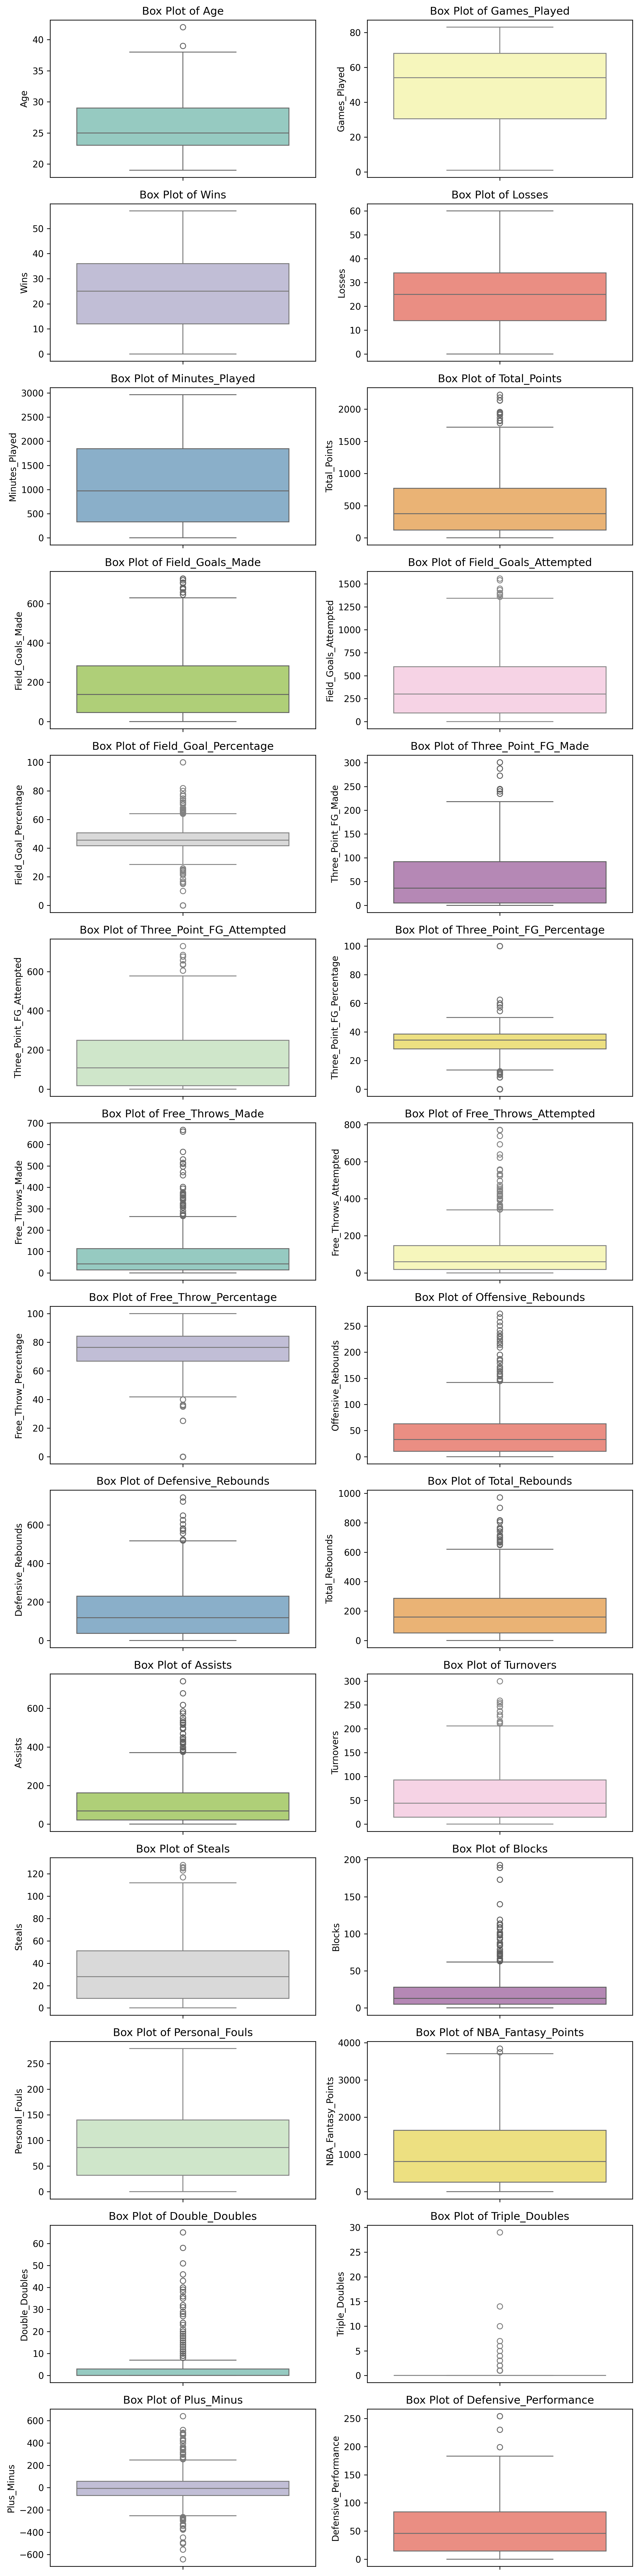

In [31]:
column_to_exclude = ['Player_Name', 'Position', 'Team_Abbreviation']

all_columns = df.columns

columns = all_columns.drop(column_to_exclude).values

num_columns = len(columns)
num_rows = (num_columns + 1) // 2

fig, axes = plt.subplots(num_rows, 2, figsize=(10, 40),dpi = 300)

colors = sns.color_palette("Set3", num_columns)
for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    sns.boxplot(data=df[column], ax=axes[row, col], color=colors[i])
    axes[row, col].set_title(f'Box Plot of {column}')

if num_columns % 2 != 0:
    axes[-1, -1].axis('off')

plt.tight_layout()
plt.show()

In [32]:
outliers_condition = ((df['Field_Goal_Percentage'] > 90) |
                      (df['Field_Goal_Percentage'] == 0) |
                      (df['Three_Point_FG_Percentage'] > 90) |
                      (df['Three_Point_FG_Percentage'] == 0) |
                      (df['Free_Throw_Percentage'] == 0))

df = df[~outliers_condition]

In [33]:
import plotly.graph_objects as go

# Select only numeric columns to calculate the correlation matrix
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

# Create the heatmap with green shades
fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.index,
    colorscale='Greens',  # Use green color scale
))

# Update layout for added style
fig.update_layout(
    title=dict(
        text='Correlation Heatmap',
        font=dict(size=24, color='LightGrey'),
        x=0.5,
        xanchor='center'
    ),
    xaxis_title='Features',
    yaxis_title='Features',
    xaxis=dict(tickfont=dict(color='LightGrey')),
    yaxis=dict(tickfont=dict(color='LightGrey')),
    height=1000,
    width=1000,
    template='plotly_dark'
)

# Show the heatmap
fig.show()


**FEATURES**

In [34]:
df.drop(columns=['Player_Name', 'Position', 'Team_Abbreviation', 'Field_Goals_Made', 'Field_Goals_Attempted', 'Three_Point_FG_Made',
                 'Three_Point_FG_Attempted', 'Three_Point_FG_Percentage', 'NBA_Fantasy_Points', 'Double_Doubles','Free_Throws_Attempted',
                 'Triple_Doubles', 'Offensive_Rebounds', 'Defensive_Rebounds'],
        inplace=True)

**SPLITTING THE DATASET**

In [35]:
X = df.drop('Total_Points',axis = 1)
y = df['Total_Points']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [36]:
row, col = X_train.shape
print("X_train have",row,"rows and",col,"columns.")
row, col = X_test.shape
print("X_test have",row,"rows and",col,"columns.")

X_train have 376 rows and 16 columns.
X_test have 94 rows and 16 columns.


**MODELLING**

**LINEAR REGRESSION**

In [37]:
model = LinearRegression()

test_sizes = [0.15, 0.2, 0.25, 0.3]
random_states = [0, 1, 42, 43, 100, 313]

best_test_size = None
best_random_state = None
best_r2_score = -float('inf')

for test_size in test_sizes:
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(df.drop('Total_Points', axis=1), df['Total_Points'], test_size=test_size, random_state=random_state)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_test_size = test_size
            best_random_state = random_state

print(f"Best test size: {best_test_size}")
print(f"Best random state: {best_random_state}")
print(f"Best R2 score: {best_r2_score}")

Best test size: 0.2
Best random state: 43
Best R2 score: 0.9733468636997125


**Linear Regression model training and evaluation**

In [38]:
X_train, X_test , y_train, y_test = train_test_split(df.drop('Total_Points', axis=1), df['Total_Points'], test_size=.2, random_state=43)

LRmodel = LinearRegression(fit_intercept=True)
LRmodel.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred = LRmodel.predict(X_test)
r2_score(y_test, y_pred)

0.9733468636997125

**K NEAREST NEIGHBOUR KNN REGRESSION MODEL AND EVALUATION**

In [40]:
model = KNeighborsRegressor()

test_sizes = [0.15, 0.2, 0.25, 0.3]
random_states = [0, 1, 42, 43, 100, 313]

best_test_size = None
best_random_state = None
best_r2_score = -float('inf')

for test_size in test_sizes:
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(df.drop('Total_Points', axis=1), df['Total_Points'], test_size=test_size, random_state=random_state)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_test_size = test_size
            best_random_state = random_state

print(f"Best test size: {best_test_size}")
print(f"Best random state: {best_random_state}")
print(f"Best R2 score: {best_r2_score}")

Best test size: 0.2
Best random state: 0
Best R2 score: 0.9300477855230884


**HYPERMETER TUNING FOR KNN**

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Total_Points', axis=1), df['Total_Points'], test_size=0.2, random_state=0)

KNNmodel = KNeighborsRegressor()

param_grid = {
    'n_neighbors': range(3,11,2),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

grid_search = GridSearchCV(estimator=KNNmodel, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

best_r2_score = grid_search.best_score_
best_params = grid_search.best_params_
print(f"Best R2 score: {best_r2_score}")
print(f"Best hyperparameters: {best_params}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_r2 = r2_score(y_test, y_pred)
print(f"R2 score on test set: {test_r2}")

Best R2 score: 0.906935512772673
Best hyperparameters: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
R2 score on test set: 0.9206313107932969


**TEST SIZE TUNING FOR DECISSION TREE REGRESSOR**

In [42]:
model = DecisionTreeRegressor()

test_sizes = [0.1, 0.15, 0.2, 0.3]
random_states = [0, 1, 42, 43, 100, 313]

best_test_size = None
best_random_state = None
best_r2_score = -float('inf')

for test_size in test_sizes:
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(df.drop('Total_Points', axis=1), df['Total_Points'], test_size=test_size, random_state=random_state)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_test_size = test_size
            best_random_state = random_state

print(f"Best test size: {best_test_size}")
print(f"Best random state: {best_random_state}")
print(f"Best R2 score: {best_r2_score}")

Best test size: 0.1
Best random state: 42
Best R2 score: 0.9494892798726182


**HYPERMETER TUNING FOR DECISION TREE TO CHECK OVERFITTING**

In [43]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Total_Points', axis=1), df['Total_Points'], test_size=0.15, random_state=100)

DTRmodel = DecisionTreeRegressor()
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [15, 20, 25, 30, 35],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10]
}

grid_search = GridSearchCV(estimator=DTRmodel, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

best_r2_score = grid_search.best_score_
best_params = grid_search.best_params_
print(f"Best R2 score: {best_r2_score}")
print(f"Best hyperparameters: {best_params}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_r2 = r2_score(y_test, y_pred)
print(f"R2 score on test set: {test_r2}")

Best R2 score: 0.9132578424548716
Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 15}
R2 score on test set: 0.955071689661187


**RANDOM FOREST HYPERTUNING**

In [44]:
test_sizes = [0.1, 0.15, 0.2, 0.3]
random_states = [0, 1, 42, 43, 100, 313]

best_test_size = None
best_random_state = None
best_r2_score = -float('inf')

for test_size in test_sizes:
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(df.drop('Total_Points', axis=1), df['Total_Points'], test_size=test_size, random_state=random_state)
        model = RandomForestRegressor(n_estimators=100, max_depth=5)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_test_size = test_size
            best_random_state = random_state

print(f"Best test size: {best_test_size}")
print(f"Best random state: {best_random_state}")
print(f"Best R2 score: {best_r2_score}")

Best test size: 0.1
Best random state: 0
Best R2 score: 0.9732999892053241


**TEST SIZE TUNING FOR RANDOM FOREST**

In [46]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Total_Points', axis=1), df['Total_Points'], test_size=0.1, random_state=0)

RFRmodel = RandomForestRegressor()

param_grid = {
    'n_estimators': range(80,160,10),
    'max_depth': range(1,20,2),
}

grid_search = GridSearchCV(estimator=RFRmodel, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

best_r2_score = grid_search.best_score_
best_params = grid_search.best_params_
print(f"Best R2 score: {best_r2_score}")
print(f"Best hyperparameters: {best_params}")

best_RFRmodel = grid_search.best_estimator_
y_pred = best_RFRmodel.predict(X_test)
test_r2 = r2_score(y_test, y_pred)
print(f"R2 score on test set: {test_r2}")

Best R2 score: 0.9471024256893669
Best hyperparameters: {'max_depth': 13, 'n_estimators': 80}
R2 score on test set: 0.9706805706718369


**SUPPORT VECTOR MACHINE**

In [51]:
# Import necessary libraries
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Assuming df is already loaded and contains the necessary columns
# Drop non-numeric columns for simplicity, and handle NaNs if any
df = df.select_dtypes(include=[np.number]).dropna()

# Define the target variable and features
X = df.drop(columns=['Total_Points'])
y = df['Total_Points']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
test_size = 0.2
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_size, random_state=random_state)

# Initialize the SVM model with a parameter grid for hyperparameter tuning
param_grid = {
    'kernel': ['linear', 'rbf'],        # Limited kernels for quicker tuning
    'C': [1, 10, 100],                  # Different regularization strengths
    'epsilon': [0.1, 0.2, 0.5]          # Epsilon values for the epsilon-tube
}

# Initialize GridSearchCV for hyperparameter tuning
svr = SVR()
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='r2', cv=3, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best model and hyperparameters
best_svr = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test set
y_pred = best_svr.predict(X_test)

# Calculate performance metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Output results
print(f"Best hyperparameters: {best_params}")
print(f"R² score: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best hyperparameters: {'C': 100, 'epsilon': 0.2, 'kernel': 'linear'}
R² score: 0.9726505403723943
Mean Absolute Error (MAE): 57.28005055857522
Root Mean Squared Error (RMSE): 90.06753237252563


**XG BOOST**

In [48]:
!pip install xgboost


In [52]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming df is already loaded and contains the necessary columns
# Drop non-numeric columns for simplicity, and handle NaNs if any
df = df.select_dtypes(include=[np.number]).dropna()

# Define the target variable and features
X = df.drop(columns=['Total_Points'])
y = df['Total_Points']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
test_size = 0.2
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_size, random_state=random_state)

# Define the XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=random_state)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# Set up grid search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='r2', cv=3, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best model and hyperparameters
best_xgb = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test set
y_pred = best_xgb.predict(X_test)

# Calculate performance metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Output results
print(f"Best hyperparameters: {best_params}")
print(f"R² score: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best hyperparameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
R² score: 0.963817298412323
Mean Absolute Error (MAE): 65.41982143483263
Root Mean Squared Error (RMSE): 103.59630899422963


**VISUAL REPRESENTATION OF ACTUAL VS PREDCITED RESULTS**

In [53]:
y_final = best_RFRmodel.predict(X)

comparison_df = pd.DataFrame({'Actual': y, 'Predicted': y_final})

fig_scatter = px.scatter(comparison_df, x='Actual', y='Predicted', color='Actual',
                         template='plotly_dark', title='Comparison of Actual vs. Predicted',
                         labels={'Actual': 'Actual Points', 'Predicted': 'Predicted Points'})

fig_hist = px.histogram(comparison_df, x=['Actual', 'Predicted'], nbins=30, barmode='overlay',
                        template='plotly_dark', title='Distribution of Actual and Predicted Points',
                        labels={'value': 'Points', 'variable': 'Values'}, color_discrete_sequence=['#185ADB', '#FC5C9C'])

residuals = y - y_final
fig_residual = go.Figure(data=go.Scatter(x=y_final, y=residuals, mode='markers',
                                        marker=dict(color='orangered'), showlegend=False))
fig_residual.add_shape(go.layout.Shape(type='line', x0=min(y_final), x1=max(y_final), y0=0, y1=0,
                                      line=dict(color='orange', dash='dash')))
fig_residual.update_layout(template='plotly_dark', title='Residual Plot',
                           xaxis_title='Predicted Values', yaxis_title='Residuals')

fig_line = go.Figure()
fig_line.add_trace(go.Scatter(x=y, y=y, mode='lines', line=dict(color='#98DFD6'), name='Ideal Line'))
fig_line.add_trace(go.Scatter(x=y, y=y_final, mode='markers', marker=dict(color='orangered'), name='Predicted Values'))
fig_line.add_trace(go.Scatter(x=np.unique(y), y=np.poly1d(np.polyfit(y, y_final, 1))(np.unique(y)),
                             mode='lines', line=dict(color='#FFDD83'), name='Regression Line'))
fig_line.update_layout(template='plotly_dark', title='Predicted vs. True Line Plot',
                       xaxis_title='True Values', yaxis_title='Predicted Values')

fig_scatter.show()
fig_hist.show()
fig_residual.show()
fig_line.show()